# Fire response traits in plants from field samples

This script contains examples of R code to query tables in the database

## Load libraries

In [1]:
library(RPostgreSQL)
library(ggplot2)
##library(forcats)
library(dplyr)
#library(data.table)
require(tidyr)
library(sf)

Loading required package: DBI


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr

Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE



In [2]:
here::i_am("read-from-database/Read-and-reformat-fire-history.ipynb")

here() starts at /Users/z3529065/proyectos/fireveg/fireveg-analysis



## Connect to the database

Read database credentials

In [3]:
if (file.exists(here::here("secrets","database.ini"))) {
  tmp <- readLines(here::here("secrets","database.ini"))[-1]
  tmp <- strsplit(tmp,'=',fixed=2)
  dbinfo <- unlist(lapply(tmp,function(x) x[2]))
  names(dbinfo) <- unlist(lapply(tmp,function(x) x[1]))
  dbinfo <- data.frame(t(dbinfo),stringsAsFactors=F)
   rm(tmp)
} else {
  cat("No database information found")
}

Connection to the postgresql server (remember to update .pgpass file)

In [4]:
drv <- dbDriver("PostgreSQL") ## 
con <- dbConnect(drv, dbname = dbinfo$database,
                 host = dbinfo$host, port = dbinfo$port,
                 user = dbinfo$user)

In [5]:
qry <- 
'SELECT DISTINCT site_label, location_description, elevation, 
    ST_Transform(geom,4326) as geom, 
    survey_name, survey_description
FROM form.field_visit 
LEFT JOIN form.field_site 
    ON visit_id=site_label
LEFT JOIN form.surveys 
    USING (survey_name)'
site_locs <- read_sf(con, query=qry)

In [6]:
site_locs %>% st_drop_geometry

,site_label,location_description,elevation,survey_name,survey_description
,<chr>,<chr>,<dbl>,<chr>,<chr>
1,AlpAsh_18,"Near top of rise 110m SSW of junction of Link Rd & Elliot Way, Cabramurra",1325,KNP AlpAsh,Kosciuszko NP Alpine Ash
2,AlpAsh_19,100m above Cabramurra - Khancoban Rd,1395,KNP AlpAsh,Kosciuszko NP Alpine Ash
3,AlpAsh_25,"Below Link Rd, between Selwyn turnoff & Cabramurra",1365,KNP AlpAsh,Kosciuszko NP Alpine Ash
4,AlpAsh_26,70m below Cabra-Khancoban Rd S of Cabramurra,1400,KNP AlpAsh,Kosciuszko NP Alpine Ash
5,AlpAsh_40,"c. 2 km down Elliot Way, 50m below road roughly opposite side track",1105,KNP AlpAsh,Kosciuszko NP Alpine Ash
6,AlpAsh_68,c. 1km up Alpine Ck FT off snowy Mtns Hwy,1350,KNP AlpAsh,Kosciuszko NP Alpine Ash
7,AlpAsh_69,100m above Snowy Mtns Hwy on E side of Sawyers Hill,1450,KNP AlpAsh,Kosciuszko NP Alpine Ash
8,AlpAsh_70,150m E of Alpine Ck FT c. 3 km in from Snowy Mtns Hwy,1410,KNP AlpAsh,Kosciuszko NP Alpine Ash
9,AUSALPS_NSW038,"Delaneys Ck 40m upstream (E) from Snowy Mtns Hwy, KNP",1350,Alpine Bogs,Alpine Bogs


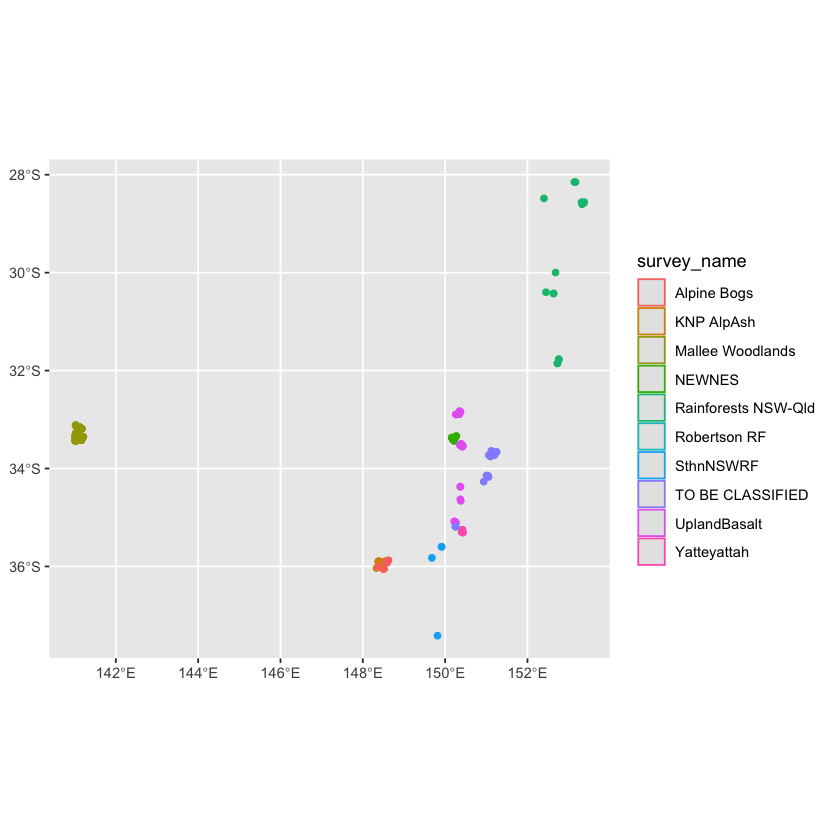

In [7]:
ggplot(site_locs) + 
    geom_sf(aes(colour=survey_name)) 

Write simple features object to a file

In [8]:
write_sf(site_locs, dsn=here::here('data','field-sites.gpkg'))

In [9]:
dbDisconnect(con)

[1] TRUE